# Visualizing Validation Results: Transformer vs IV3-GRU

This notebook visualizes and compares the validation results of the Transformer and IV3-GRU models using their respective JSON result files.

## 1. Import Required Libraries

Import libraries for data handling and visualization: pandas, numpy, matplotlib, seaborn, and json.

In [75]:
# Import Required Libraries
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Validation Results JSON Files

Load the validation results from both the IV3-GRU and Transformer JSON files using Python's json module.

In [76]:
# Define absolute file paths
iv3gru_json_path = r"C:\Users\ricaj\OneDrive\Documents\GitHub\fslr-transformer-vs-iv3gru\trained_models\iv3_gru\iv3gru_100_epochs_09-16\complete_validation_results.json" # Path to IV3-GRU results -- Change as needed
transformer_json_path = r"C:\Users\ricaj\OneDrive\Documents\GitHub\fslr-transformer-vs-iv3gru\trained_models\transformer\transformer_100_epoch_09-16\complete_validation_results.json" # Path to Transformer results -- Change as needed

# Load the validation results for both models
with open(iv3gru_json_path, "r") as f:
    iv3gru_results = json.load(f)

with open(transformer_json_path, "r") as f:
    transformer_results = json.load(f)


## 3. Extract and Compare Overall Metrics

Parse and extract overall accuracy, precision, recall, and F1-score for both models. Prepare data for comparison.

In [77]:
# Helper function to extract metrics
def extract_overall_metrics(results, prefix=""):
    overall = results["overall_results"]
    return {
        f"{prefix}gloss_accuracy": overall["gloss_accuracy"],
        f"{prefix}gloss_precision": overall["gloss_precision"],
        f"{prefix}gloss_recall": overall["gloss_recall"],
        f"{prefix}gloss_f1_score": overall["gloss_f1_score"],
        f"{prefix}category_accuracy": overall["category_accuracy"],
        f"{prefix}category_precision": overall["category_precision"],
        f"{prefix}category_recall": overall["category_recall"],
        f"{prefix}category_f1_score": overall["category_f1_score"],
    }

# Extract the metrics for both models
iv3gru_metrics = extract_overall_metrics(iv3gru_results, prefix="IV3GRU_")
transformer_metrics = extract_overall_metrics(transformer_results, prefix="Transformer_")

# Combine the metrics into a DataFrame with 3 columns and 8 rows
metrics_data = {
    "Metric": [
        "gloss_accuracy", "gloss_precision", "gloss_recall", "gloss_f1_score",
        "category_accuracy", "category_precision", "category_recall", "category_f1_score"
    ],
    "Transformer": [
        transformer_metrics.get("Transformer_gloss_accuracy", None),
        transformer_metrics.get("Transformer_gloss_precision", None),
        transformer_metrics.get("Transformer_gloss_recall", None),
        transformer_metrics.get("Transformer_gloss_f1_score", None),
        transformer_metrics.get("Transformer_category_accuracy", None),
        transformer_metrics.get("Transformer_category_precision", None),
        transformer_metrics.get("Transformer_category_recall", None),
        transformer_metrics.get("Transformer_category_f1_score", None)
    ],
    "IV3-GRU": [
        iv3gru_metrics.get("IV3GRU_gloss_accuracy", None),
        iv3gru_metrics.get("IV3GRU_gloss_precision", None),
        iv3gru_metrics.get("IV3GRU_gloss_recall", None),
        iv3gru_metrics.get("IV3GRU_gloss_f1_score", None),
        iv3gru_metrics.get("IV3GRU_category_accuracy", None),
        iv3gru_metrics.get("IV3GRU_category_precision", None),
        iv3gru_metrics.get("IV3GRU_category_recall", None),
        iv3gru_metrics.get("IV3GRU_category_f1_score", None)
    ]
}

# Convert the dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the DataFrame
metrics_df


,Metric,Transformer,IV3-GRU
0,gloss_accuracy,0.045455,0.107656
1,gloss_precision,0.028169,0.017458
2,gloss_recall,0.045455,0.107656
3,gloss_f1_score,0.022128,0.029091
4,category_accuracy,0.177033,0.985646
5,category_precision,0.234519,0.986744
6,category_recall,0.177033,0.985646
7,category_f1_score,0.113961,0.985619


## 4. Visualize Overall Metrics (Bar Plots)

Create bar plots to compare overall metrics (accuracy, precision, recall, F1-score) between the two models.

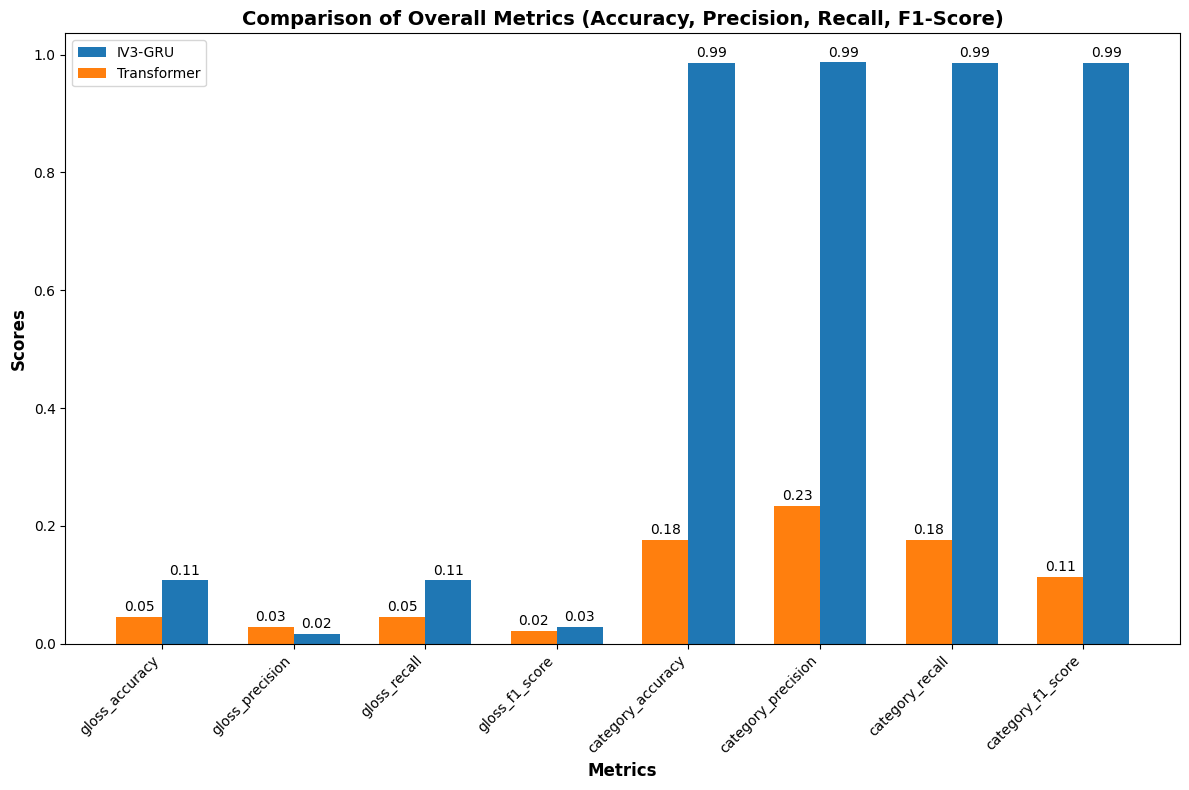

In [78]:
# Metrics for plotting
metrics = ['gloss_accuracy', 'gloss_precision', 'gloss_recall', 'gloss_f1_score', 
            'category_accuracy', 'category_precision', 'category_recall', 'category_f1_score']

# Extract values for plotting
transformer_values = [
    transformer_metrics.get(f"Transformer_{metric}", None) for metric in metrics
]
iv3gru_values = [
    iv3gru_metrics.get(f"IV3GRU_{metric}", None) for metric in metrics
]

# Create a DataFrame for easy plotting
plot_df = pd.DataFrame({
    'Metric': metrics,
    'Transformer': transformer_values,
    'IV3-GRU': iv3gru_values
})

# Bars for each model
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(metrics))
plt.bar(index + bar_width, plot_df['IV3-GRU'], bar_width, label='IV3-GRU')
plt.bar(index, plot_df['Transformer'], bar_width, label='Transformer')

# Titles and Labels
plt.xlabel('Metrics', fontsize=12, fontweight='bold')
plt.ylabel('Scores', fontsize=12, fontweight='bold')
plt.title('Comparison of Overall Metrics (Accuracy, Precision, Recall, F1-Score)', fontsize=14, fontweight='bold')

# Rotated tick labels for better readability
plt.xticks(index + bar_width / 2, plot_df['Metric'], rotation=45, ha='right', fontsize=10)

# Value labels on top of each bar
for i in range(len(metrics)):
    plt.text(i, plot_df['Transformer'][i] + 0.01, f"{plot_df['Transformer'][i]:.2f}", ha='center', fontsize=10, color='black')
    plt.text(i + bar_width, plot_df['IV3-GRU'][i] + 0.01, f"{plot_df['IV3-GRU'][i]:.2f}", ha='center', fontsize=10, color='black')

plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


## 5. Visualize Per-Class Metrics (Heatmaps/Bar Plots)

Plot per-class precision, recall, and F1-score for both models using heatmaps or grouped bar plots.

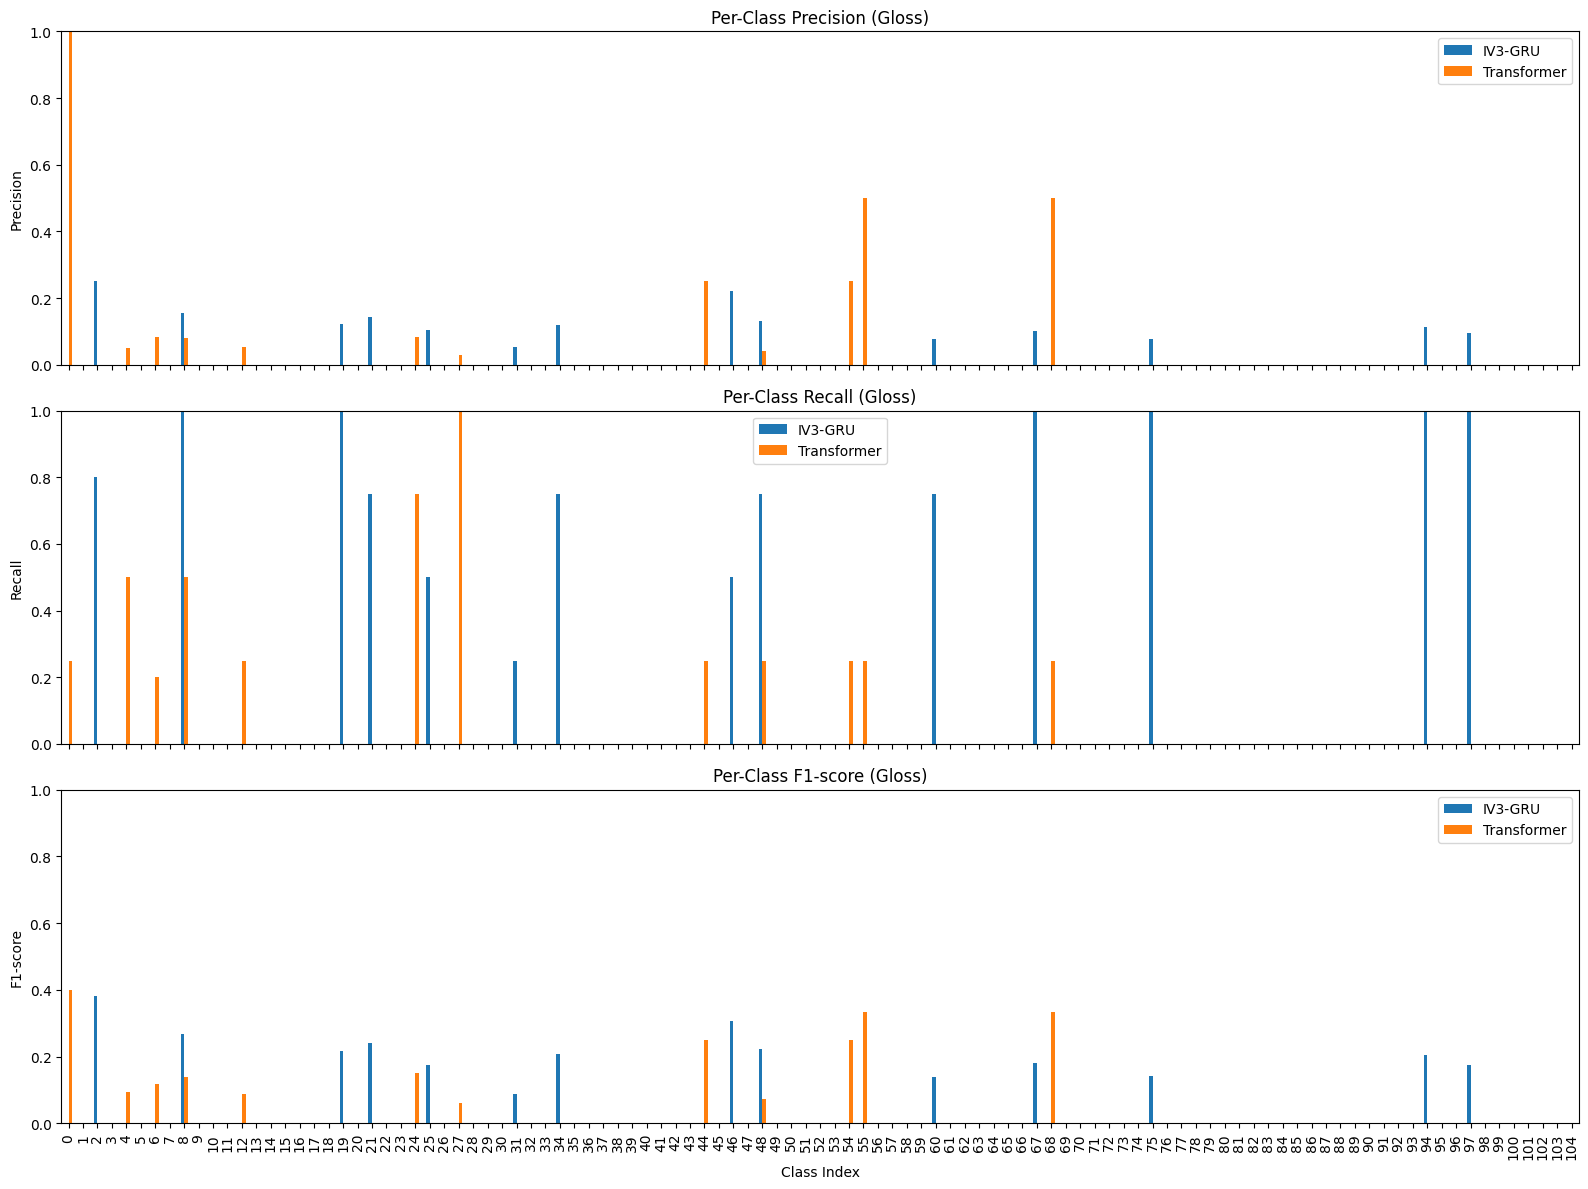

In [83]:
# Extract per-class metrics for gloss
def per_class_to_df(per_class_dict, metric):
    # Remove non-integer keys (like 'accuracy', 'macro avg', etc.)
    class_metrics = {int(k): v[metric] for k, v in per_class_dict.items() if k.isdigit()}
    return pd.Series(class_metrics).sort_index()

iv3gru_gloss_per_class = iv3gru_results["per_class_results"]["gloss_per_class"]
transformer_gloss_per_class = transformer_results["per_class_results"]["gloss_per_class"]

metrics = ["precision", "recall", "f1-score"]

fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)
for idx, metric in enumerate(metrics):
    iv3gru_vals = per_class_to_df(iv3gru_gloss_per_class, metric)
    transformer_vals = per_class_to_df(transformer_gloss_per_class, metric)
    df = pd.DataFrame({
        "IV3-GRU": iv3gru_vals,
        "Transformer": transformer_vals
    })
    df.plot(kind="bar", ax=axes[idx])
    axes[idx].set_title(f"Per-Class {metric.capitalize()} (Gloss)")
    axes[idx].set_ylabel(metric.capitalize())
    axes[idx].set_ylim(0, 1)

plt.xlabel("Class Index")
plt.tight_layout()
plt.show()

## 6. Visualize Confusion Matrices (Heatmaps)

Display confusion matrices for both models as heatmaps for gloss and category predictions.

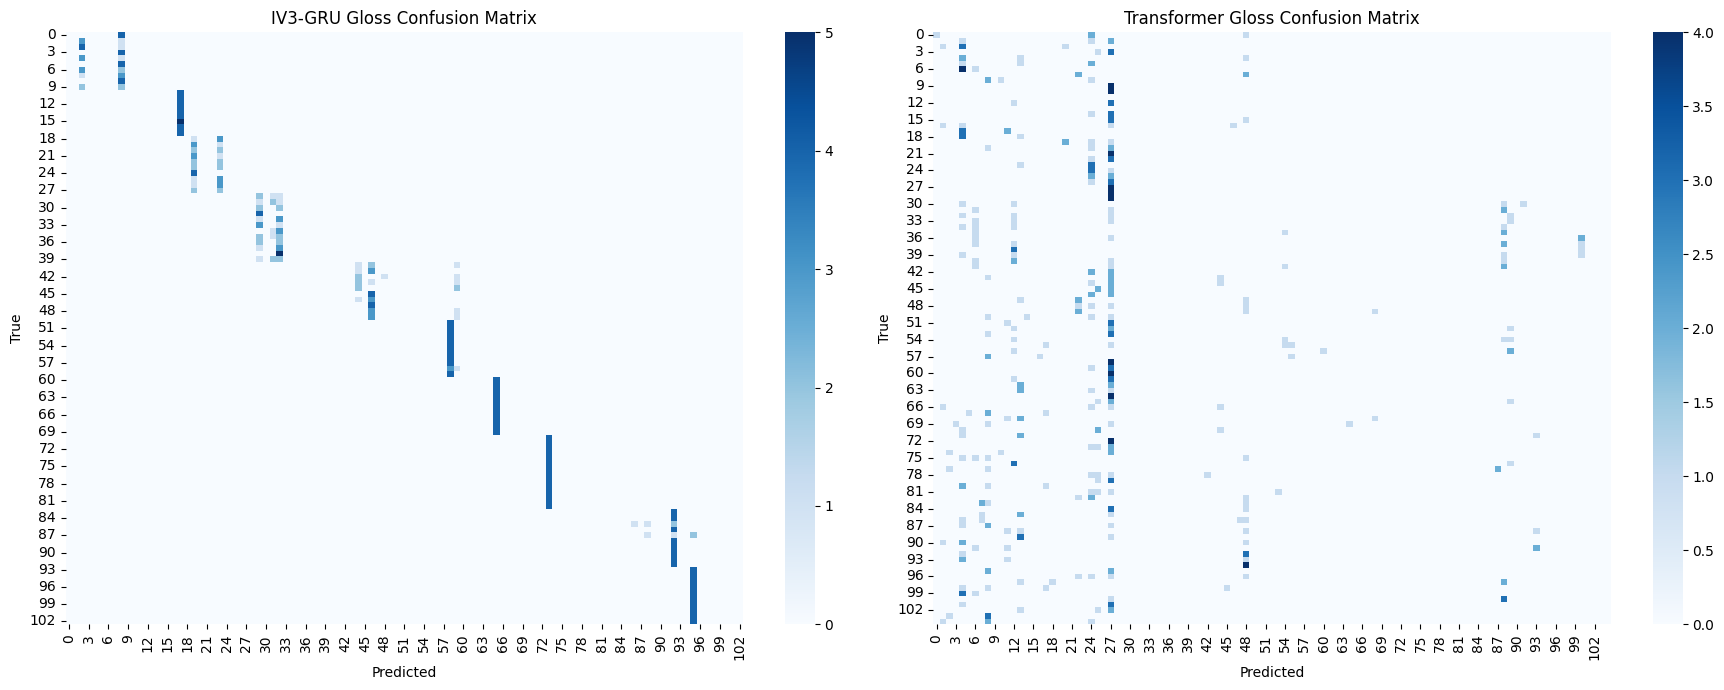

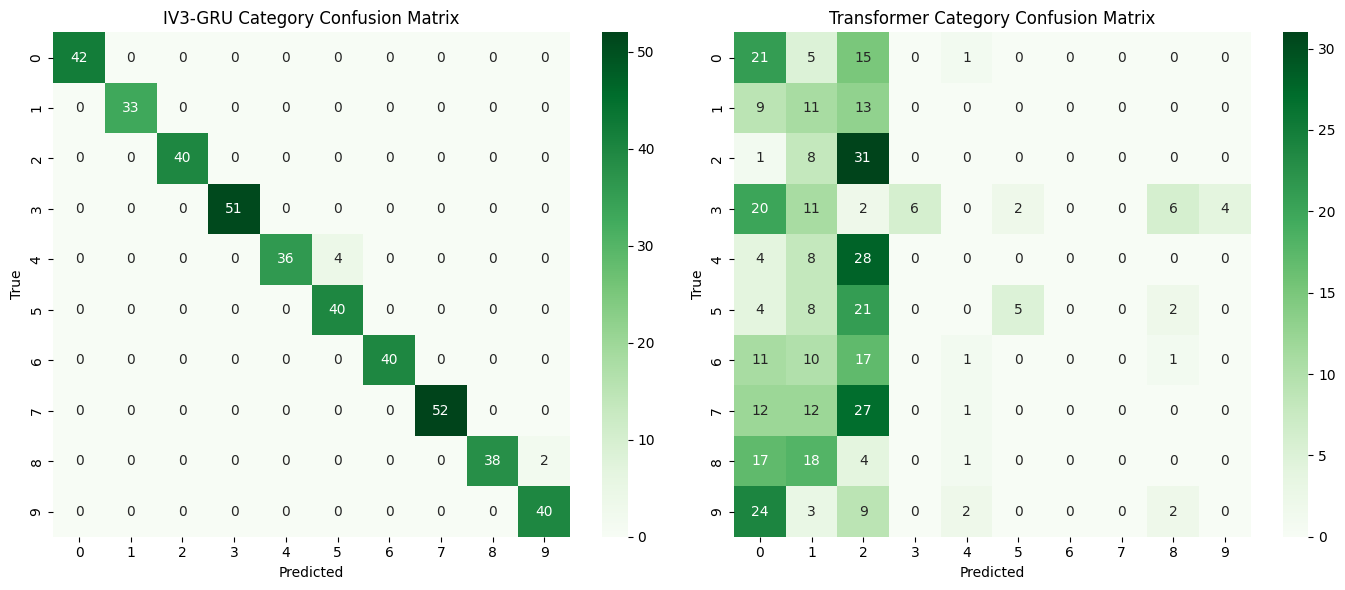

In [80]:
# Gloss confusion matrices
iv3gru_gloss_cm = np.array(iv3gru_results["confusion_matrices"]["gloss_confusion_matrix"])
transformer_gloss_cm = np.array(transformer_results["confusion_matrices"]["gloss_confusion_matrix"])

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.heatmap(iv3gru_gloss_cm, ax=axes[0], cmap="Blues", cbar=True)
axes[0].set_title("IV3-GRU Gloss Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

sns.heatmap(transformer_gloss_cm, ax=axes[1], cmap="Blues", cbar=True)
axes[1].set_title("Transformer Gloss Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()

# Category confusion matrices
iv3gru_cat_cm = np.array(iv3gru_results["confusion_matrices"]["category_confusion_matrix"])
transformer_cat_cm = np.array(transformer_results["confusion_matrices"]["category_confusion_matrix"])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(iv3gru_cat_cm, annot=True, fmt="d", ax=axes[0], cmap="Greens")
axes[0].set_title("IV3-GRU Category Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

sns.heatmap(transformer_cat_cm, annot=True, fmt="d", ax=axes[1], cmap="Greens")
axes[1].set_title("Transformer Category Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()

## 7. Visualize Occluded vs Non-Occluded Performance

Plot and compare the performance (accuracy, precision, recall, F1-score) of both models on occluded and non-occluded samples.

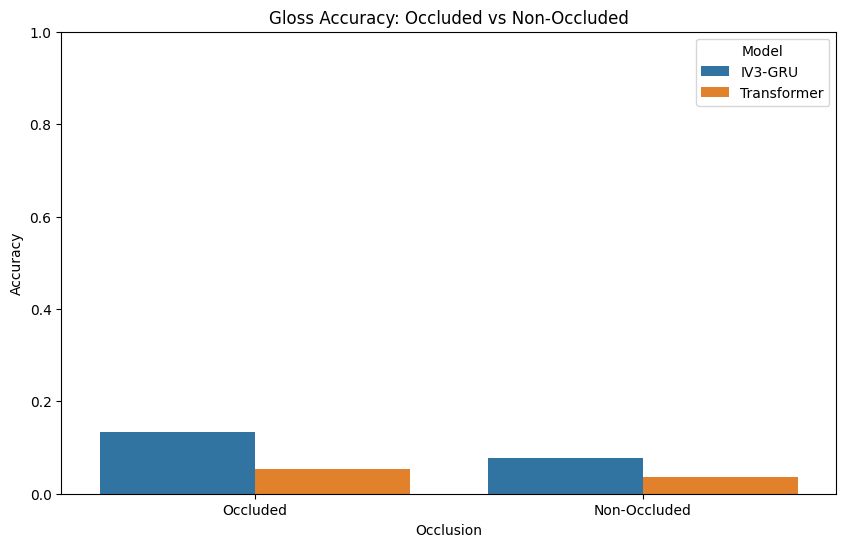

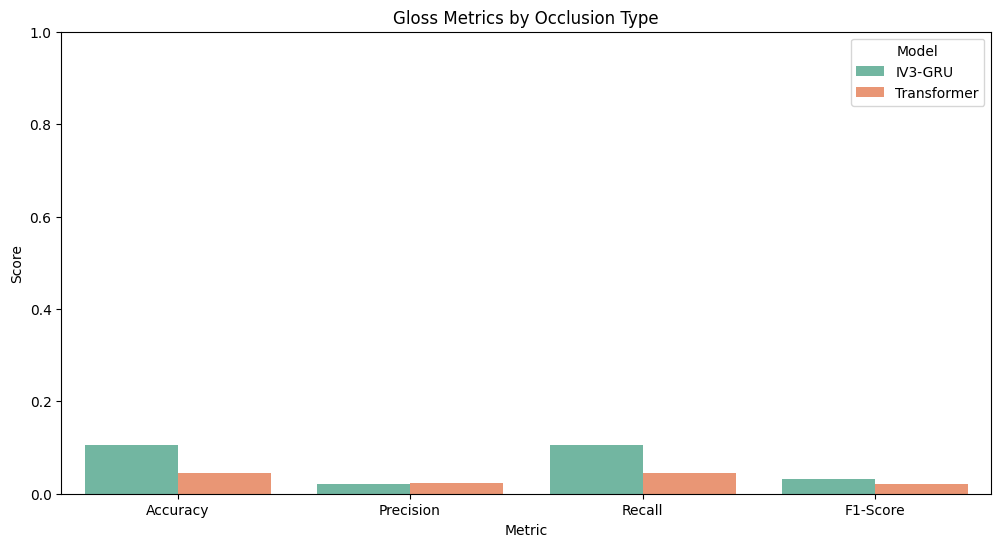

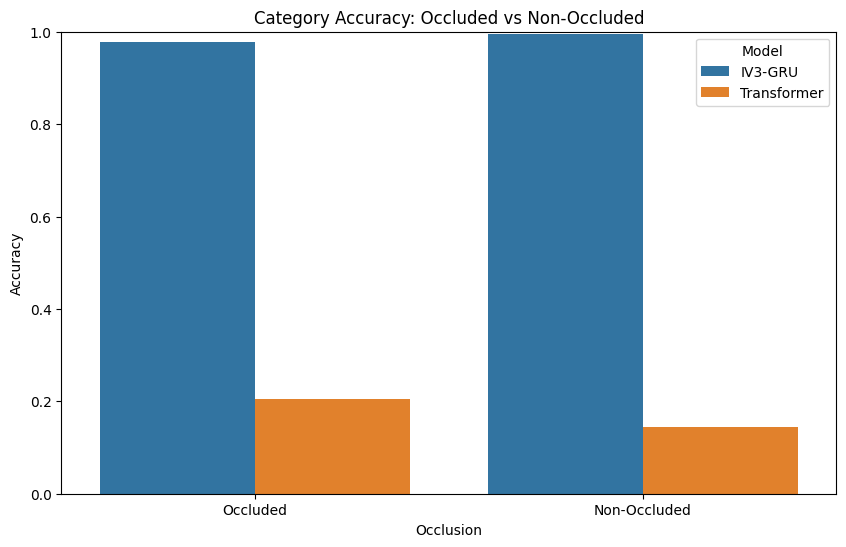

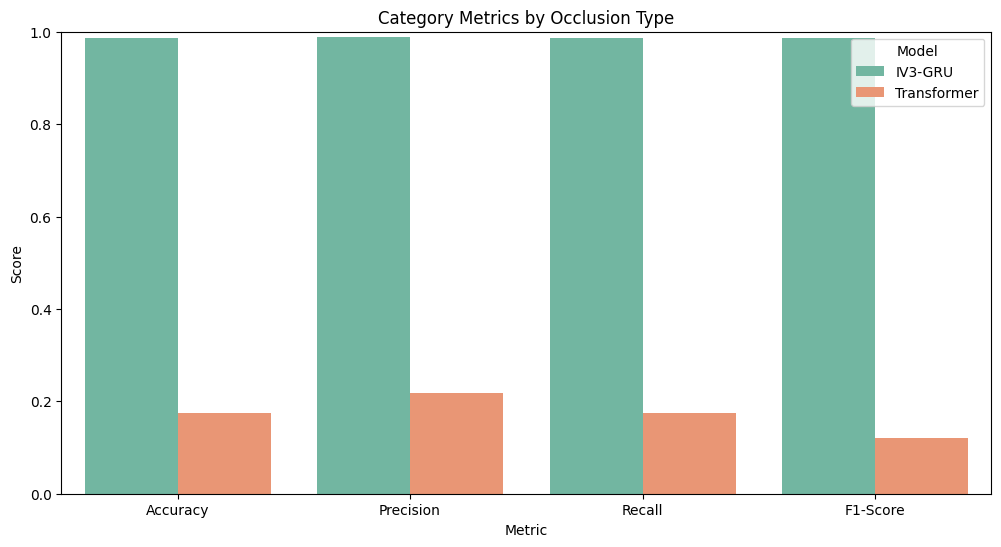

In [89]:
# Helper to extract occluded/non-occluded metrics
def extract_occlusion_metrics(results, occlusion_key, prefix=""):
    section = results[occlusion_key]
    return {
        f"{prefix}gloss_accuracy": section["gloss_accuracy"],
        f"{prefix}gloss_precision": section["gloss_precision"],
        f"{prefix}gloss_recall": section["gloss_recall"],
        f"{prefix}gloss_f1_score": section["gloss_f1_score"],
        f"{prefix}category_accuracy": section["category_accuracy"],
        f"{prefix}category_precision": section["category_precision"],
        f"{prefix}category_recall": section["category_recall"],
        f"{prefix}category_f1_score": section["category_f1_score"],
    }

occlusion_types = [("occluded_results", "Occluded"), ("non_occluded_results", "Non-Occluded")]
tasks = ["gloss", "category"]
metrics = ["accuracy", "precision", "recall", "f1_score"]

for task in tasks:
    data = []
    for results, model_name in zip([iv3gru_results, transformer_results], ["IV3-GRU", "Transformer"]):
        for occl_key, occl_label in occlusion_types:
            m = results[occl_key]
            row = {
                "Model": model_name,
                "Occlusion": occl_label,
                "Accuracy": m[f"{task}_accuracy"],
                "Precision": m[f"{task}_precision"],
                "Recall": m[f"{task}_recall"],
                "F1-Score": m[f"{task}_f1_score"],
            }
            data.append(row)
    df = pd.DataFrame(data)
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df,
        x="Occlusion",
        y="Accuracy",
        hue="Model"
    )
    plt.title(f"{task.capitalize()} Accuracy: Occluded vs Non-Occluded")
    plt.ylim(0, 1)
    plt.show()

    # Plot all metrics
    df_melt = df.melt(id_vars=["Model", "Occlusion"], value_vars=["Accuracy", "Precision", "Recall", "F1-Score"],
                        var_name="Metric", value_name="Score")
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=df_melt,
        x="Metric",
        y="Score",
        hue="Model",
        errorbar=None,
        palette="Set2",
        dodge=True
    )
    plt.title(f"{task.capitalize()} Metrics by Occlusion Type")
    plt.ylim(0, 1)
    plt.legend(title="Model")
    plt.show()